In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
%matplotlib inline
import missingno as msno
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer

In [ ]:
data=pd.read_csv('/content/syntheticdata.csv')


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
print(data.shape)
print(data.describe())

(73661, 11)
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  73661.000000  7.366100e+04   7.366100e+04    7.366000e+04   
mean       7.963156  1.652016e+05   9.019452e+05    9.180026e+05   
std        1.852437  3.326609e+05   2.775816e+06    2.814160e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        8.000000  9.207480e+03   0.000000e+00    0.000000e+00   
50%        9.000000  4.556779e+04   1.994100e+04    0.000000e+00   
75%        9.000000  2.009914e+05   1.765340e+05    1.982131e+05   
max       10.000000  1.000000e+07   3.380000e+07    3.400000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    7.366000e+04    7.366000e+04  73660.000000         73660.0  
mean     8.557550e+05    1.183263e+06      0.001507             0.0  
std      2.394639e+06    2.854504e+06      0.038790             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    

In [ ]:
fraud = data[data['isFraud'] == 1]
valid = data[data['isFraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['isFraud'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['isFraud'] == 0])))

0.0015091979496662088
Fraud Cases: 111
Valid Transactions: 73549


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73661 entries, 0 to 73660
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            73661 non-null  int64  
 1   type            73661 non-null  object 
 2   amount          73661 non-null  float64
 3   nameOrig        73661 non-null  object 
 4   oldbalanceOrg   73661 non-null  float64
 5   newbalanceOrig  73660 non-null  float64
 6   nameDest        73660 non-null  object 
 7   oldbalanceDest  73660 non-null  float64
 8   newbalanceDest  73660 non-null  float64
 9   isFraud         73660 non-null  float64
 10  isFlaggedFraud  73660 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.2+ MB


In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
data.duplicated().any()

False

In [ ]:
is_fraud = data["isFraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  111
No:  73549


In [ ]:
new_type={'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2, 'CASH_IN':3, 'DEBIT':4}
data['type'] = data['type'].replace(new_type)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.drop(['isFlaggedFraud'],axis=1,inplace = True)
data.drop(['nameOrig'],axis=1,inplace = True)
data.drop(['nameDest'],axis=1,inplace = True)

In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,1,181.00,181.0,0.00,0.0,0.0,1.0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
data.shape

(73661, 8)

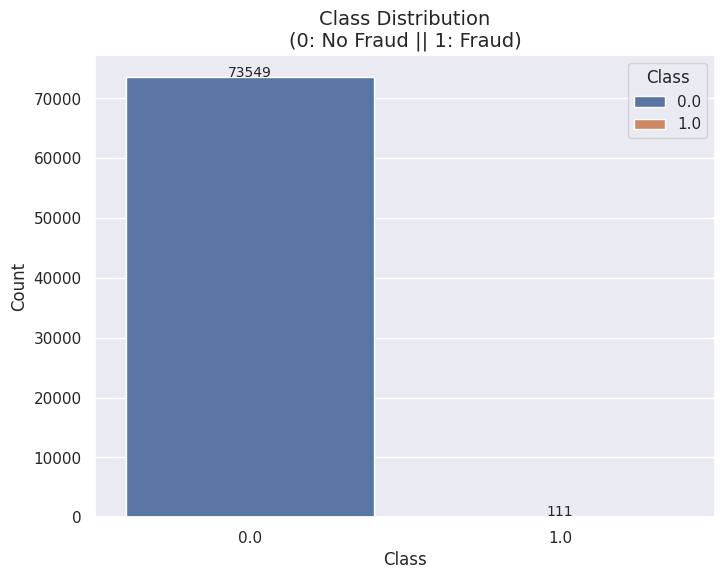

In [ ]:
class_counts = data['isFraud'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False)
plt.title('Class Distribution\n(0: No Fraud || 1: Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 100, f'{count}', ha='center', fontsize=10)

plt.legend(title='Class', loc='upper right')
plt.show()


In [ ]:
data.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,73661.000000,73661.000000,7.366100e+04,7.366100e+04,7.366000e+04,7.366000e+04,7.366000e+04,73660.000000
mean,7.963156,1.316680,1.652016e+05,9.019452e+05,9.180026e+05,8.557550e+05,1.183263e+06,0.001507
std,1.852437,1.222358,3.326609e+05,2.775816e+06,2.814160e+06,2.394639e+06,2.854504e+06,0.038790
min,1.000000,0.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,0.000000,9.207480e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,2.000000,4.556779e+04,1.994100e+04,0.000000e+00,1.571290e+04,2.440866e+04,0.000000
75%,9.000000,2.000000,2.009914e+05,1.765340e+05,1.982131e+05,5.304481e+05,9.983550e+05,0.000000
max,10.000000,4.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.130000e+07,3.200000e+07,1.000000


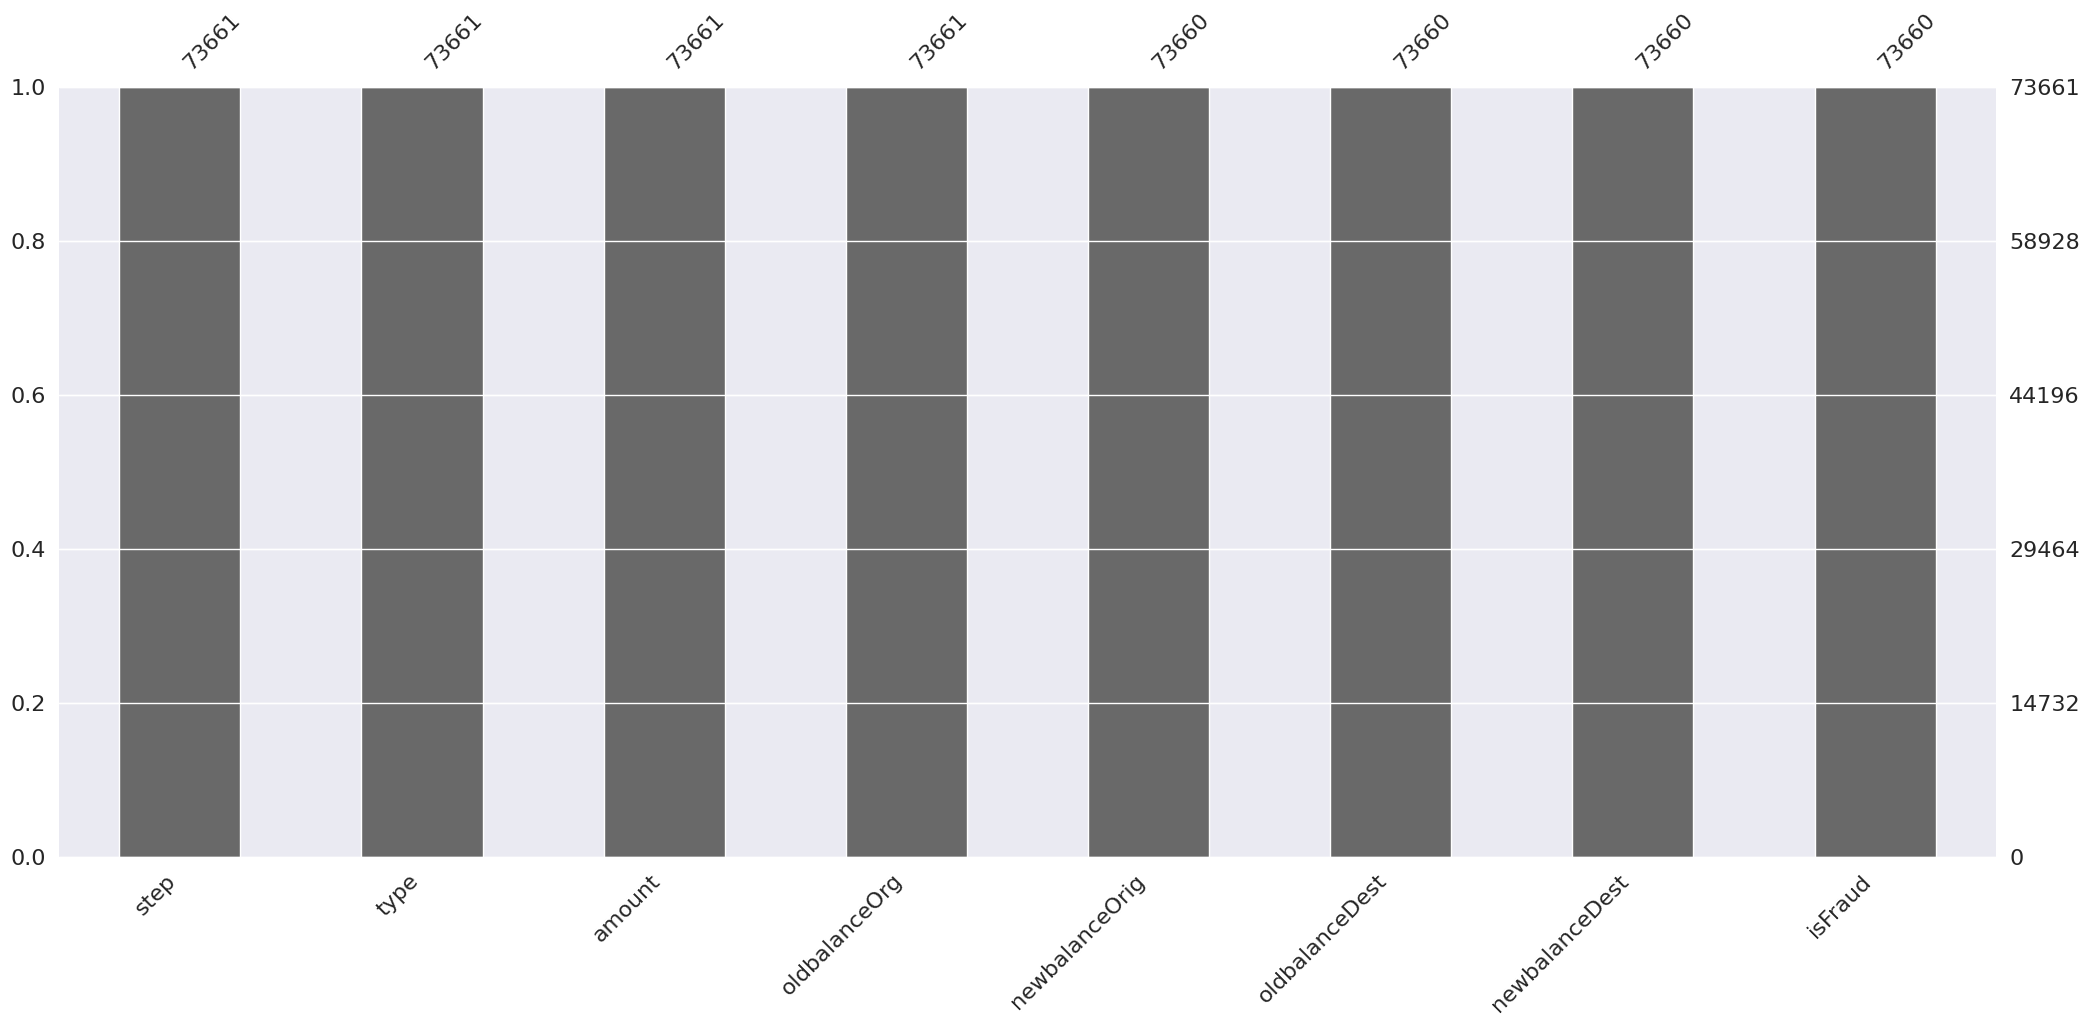

In [ ]:
msno.bar(data)
plt.show()

In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64


In [ ]:
not_fraud = data[data['isFraud']==0]
fraud = data[data['isFraud']==1]

In [ ]:
not_fraud.shape,fraud.shape

((73549, 8), (111, 8))

In [ ]:
X = data.drop(['isFraud'], axis = 1)
Y = data["isFraud"]
print(X.shape)
print(Y.shape)

(73661, 7)
(73661,)


In [ ]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)


In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,1,181.00,181.0,0.00,0.0,0.0,1.0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [ ]:
data.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
dtype: object

In [ ]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
dtype: int64


In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73661 entries, 0 to 73660
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            73661 non-null  int64  
 1   type            73661 non-null  int64  
 2   amount          73661 non-null  float64
 3   oldbalanceOrg   73661 non-null  float64
 4   newbalanceOrig  73661 non-null  float64
 5   oldbalanceDest  73661 non-null  float64
 6   newbalanceDest  73661 non-null  float64
 7   isFraud         73661 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 4.5 MB


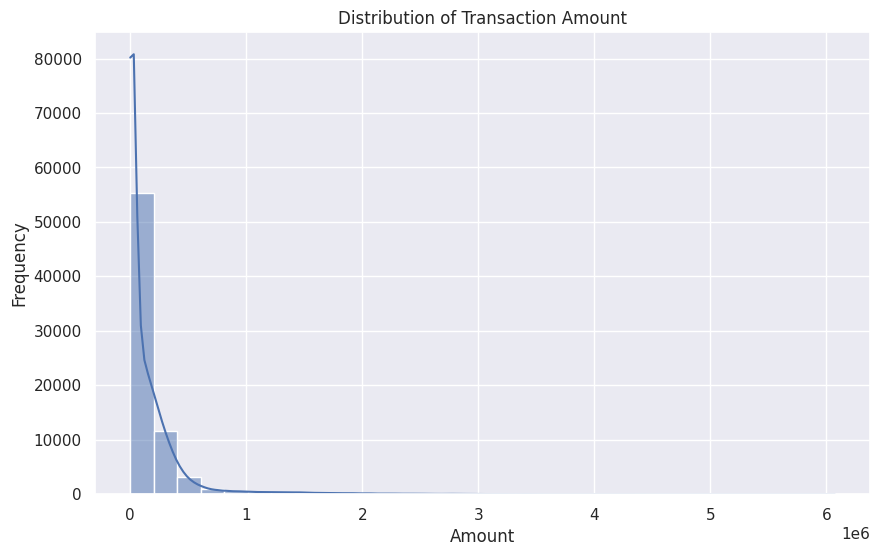

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

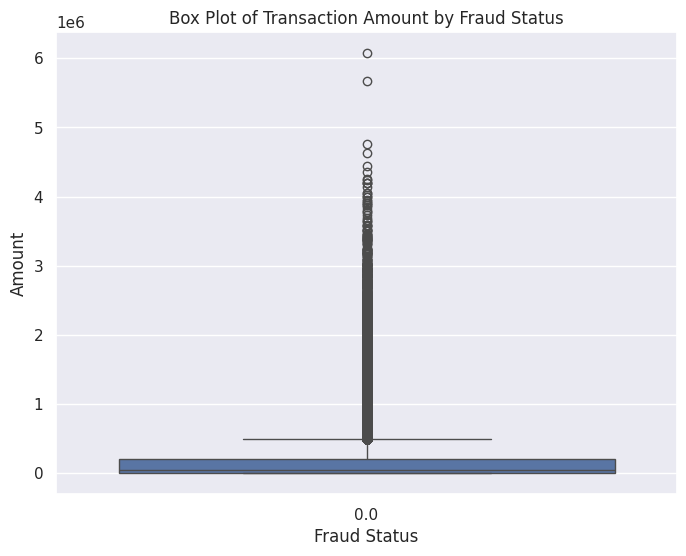

In [ ]:
# Box plot for amount by fraud status
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.show()


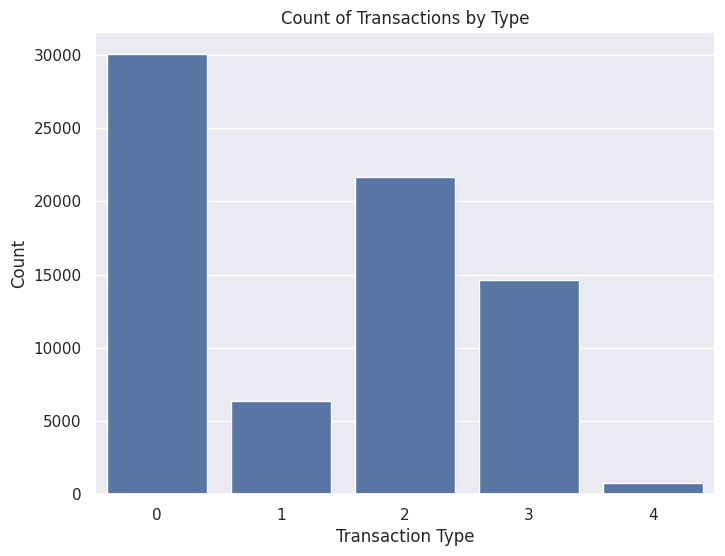

In [ ]:
# Bar plot for transaction type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title('Count of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

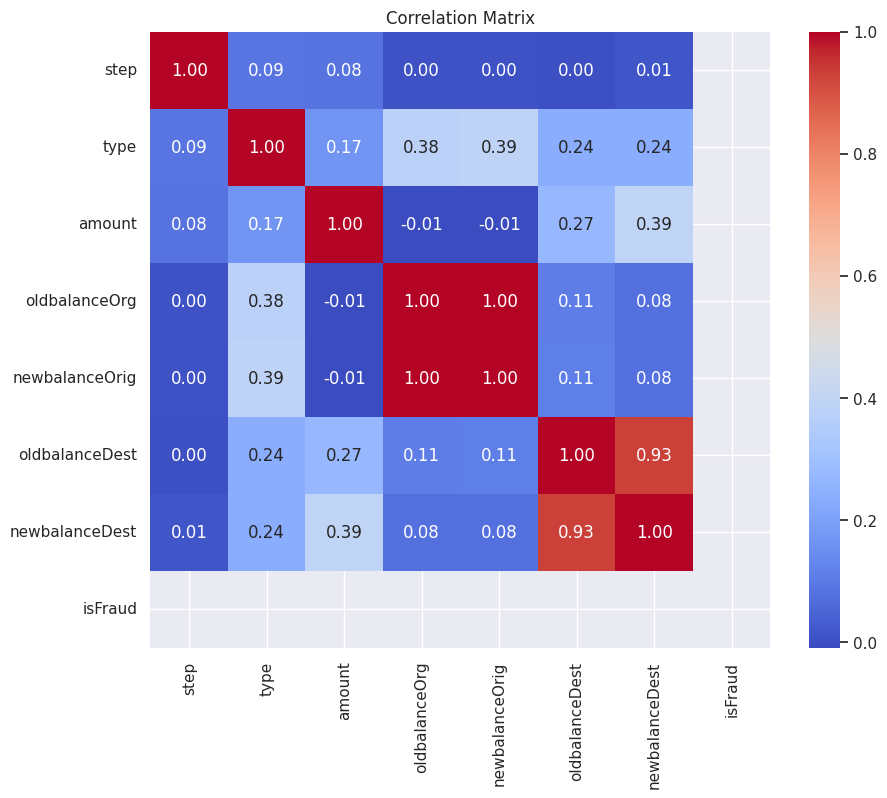

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Drop rows with missing values
X_train = X_train.dropna()
Y_train = Y_train.dropna()


In [ ]:

LR = LogisticRegression()
LR.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
data.isna()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffOrig,diffDest,totalBalanceOrig,totalBalanceDest,amountOrigRatio,amountDestRatio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73656,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73657,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73658,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73659,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[data.isna().any(axis=1)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffOrig,diffDest,totalBalanceOrig,totalBalanceDest,amountOrigRatio,amountDestRatio


In [ ]:
X_test = X_test.dropna()

In [ ]:
predict_LR = LR.predict(X_test)
print(Y_test.shape)
print(predict_LR.shape)

(14733,)
(14733,)


In [ ]:

print(classification_report(Y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,Y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       0.40      0.09      0.14        23

    accuracy                           1.00     14733
   macro avg       0.70      0.54      0.57     14733
weighted avg       1.00      1.00      1.00     14733

Logistic Regression accuracy is: 99.84%


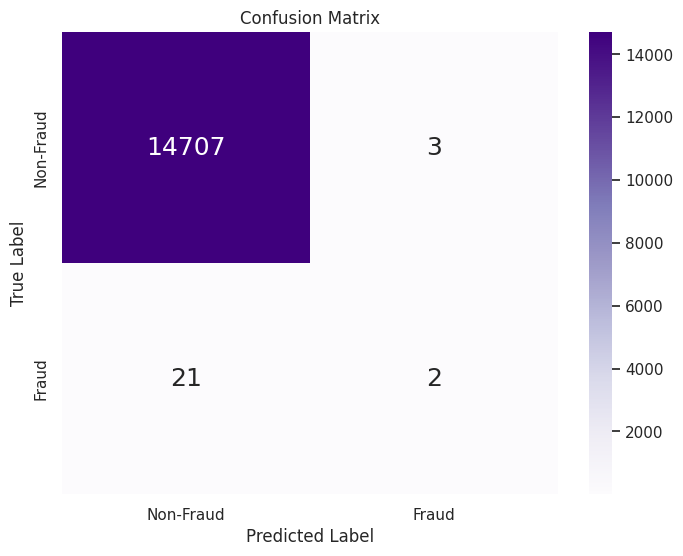

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, predict_LR)  # Using predictions from logistic regression
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.9526084000827594


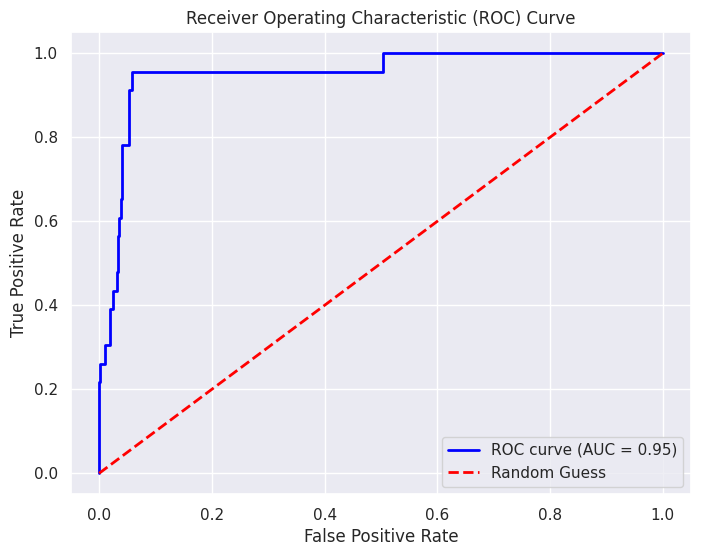

In [ ]:
# Calculate ROC-AUC score
y_prob = LR.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:

predict_DT = DT.predict(X_test)
print(classification_report(Y_test, predict_DT))
DT_accuracy = accuracy_score(predict_DT,Y_test)
print('Desicion Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     14733
   macro avg       0.50      0.50      0.50     14733
weighted avg       1.00      1.00      1.00     14733

Desicion Tree model accuracy is: 99.84%


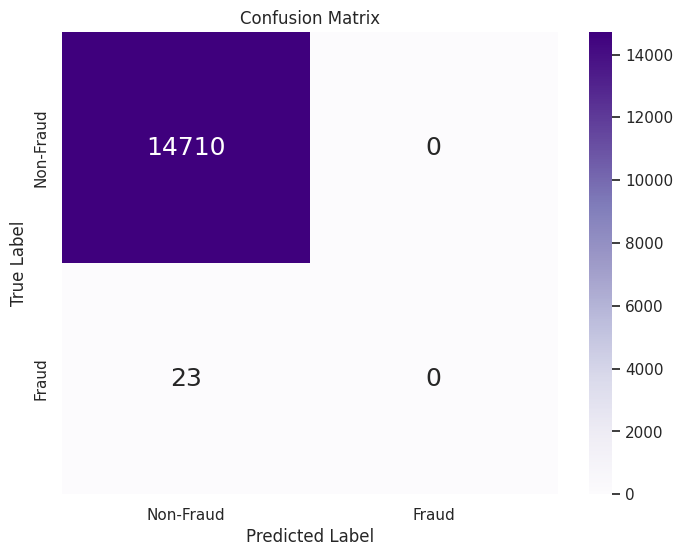

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, predict_DT)  # Using predictions from decision tree

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.5


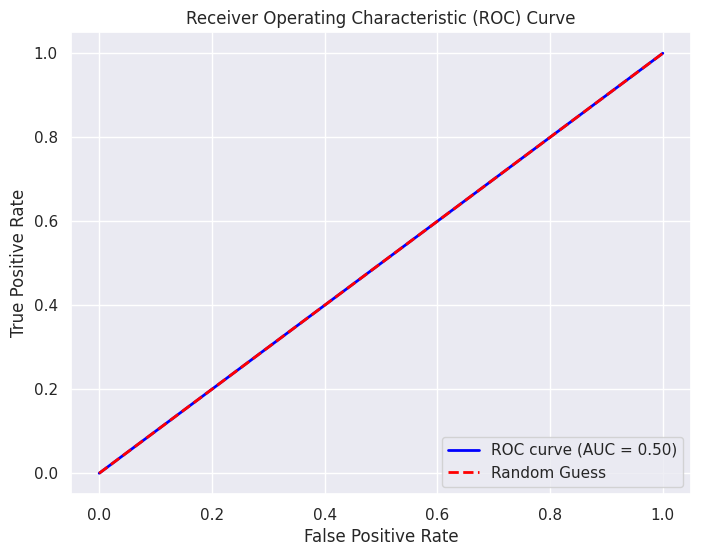

In [ ]:
# Calculate ROC-AUC score
y_prob = DT.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

# random forest model creation
rfc = RandomForestClassifier()
# Fit the model again
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = rfc.predict(X_test)
print(classification_report(Y_test, predict_rfc))
rfc_accuracy = accuracy_score(predict_rfc,Y_test)
print('random forest accuracy is: {:.2f}%'.format(rfc_accuracy*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       1.00      0.57      0.72        23

    accuracy                           1.00     14733
   macro avg       1.00      0.78      0.86     14733
weighted avg       1.00      1.00      1.00     14733

random forest accuracy is: 99.93%


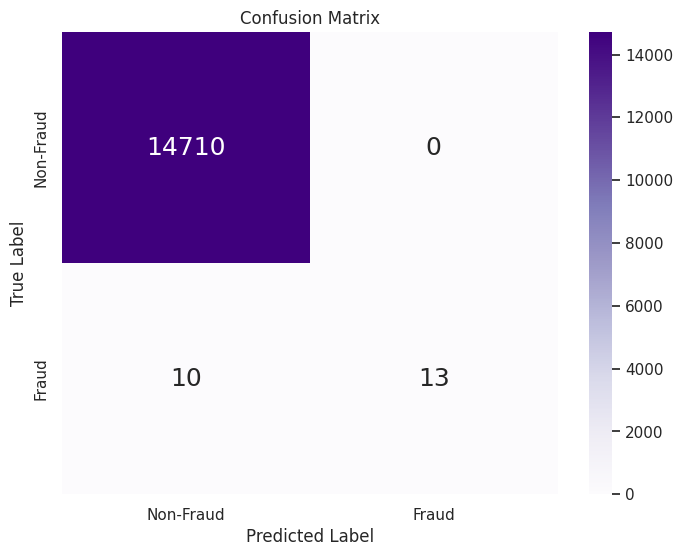

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, predict_rfc)  # Using predictions from random forest classifier

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.9776327845594538


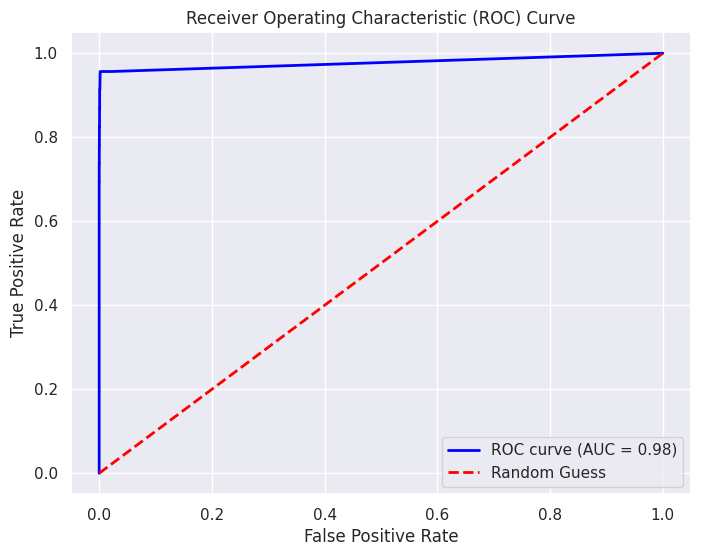

In [ ]:
# Calculate ROC-AUC score
y_prob = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:


# Create a gradient boosting classifier
GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Train the model
GB.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
GB_pred = GB.predict(X_test)
print("Gradient Boosting:")
print(classification_report(Y_test, GB_pred))
GB_accuracy = accuracy_score(GB_pred, Y_test)
print('Grading Boosting model accuracy is: {:.2f}%'.format(GB_accuracy * 100))

Gradient Boosting:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       0.80      0.52      0.63        23

    accuracy                           1.00     14733
   macro avg       0.90      0.76      0.82     14733
weighted avg       1.00      1.00      1.00     14733

Grading Boosting model accuracy is: 99.90%


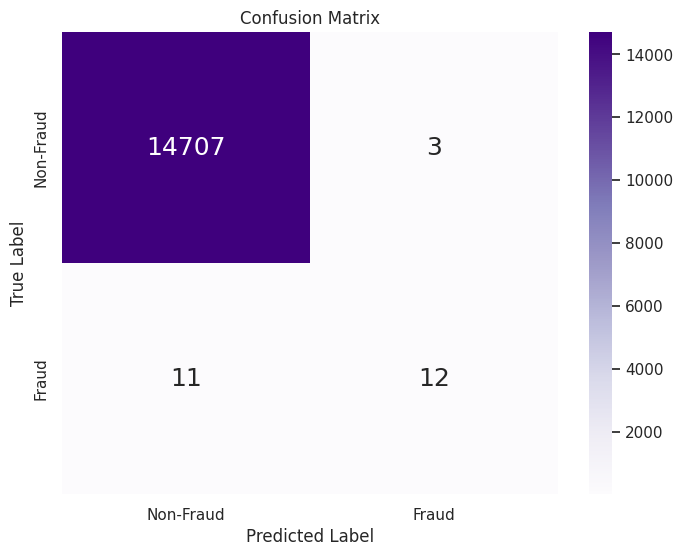

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, GB_pred)  # Using predictions from gradient boosting

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.9787958502054207


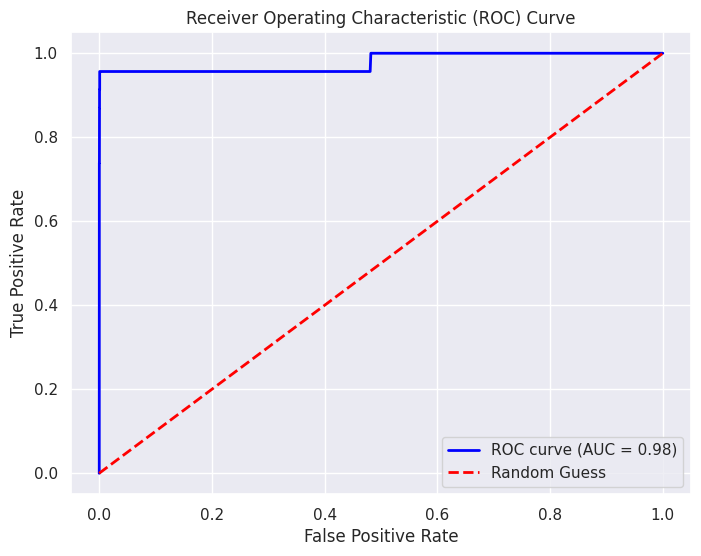

In [ ]:
# Calculate ROC-AUC score
y_prob = GB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Make predictions on the test set
predict_XGB = XGB.predict(X_test)
print("XG Boosting:")
print(classification_report(Y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, Y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))


XG Boosting:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       1.00      0.87      0.93        23

    accuracy                           1.00     14733
   macro avg       1.00      0.93      0.97     14733
weighted avg       1.00      1.00      1.00     14733

XGBoost model accuracy is: 99.98%


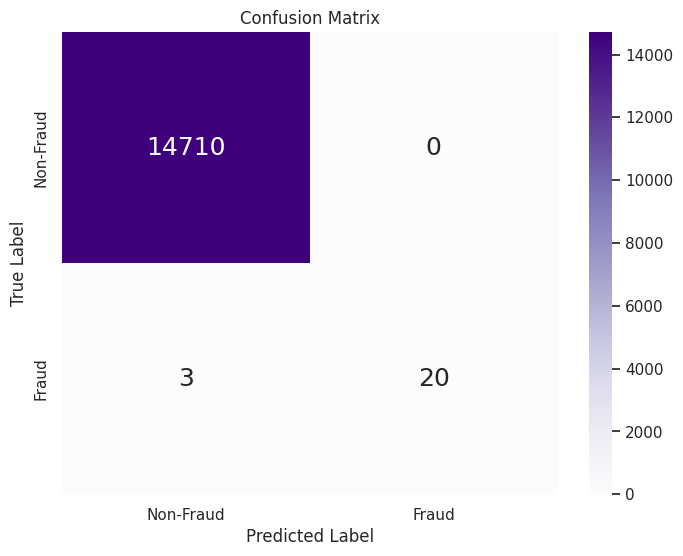

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, predict_XGB)  # Using predictions from gradient boosting

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.9844264475512075


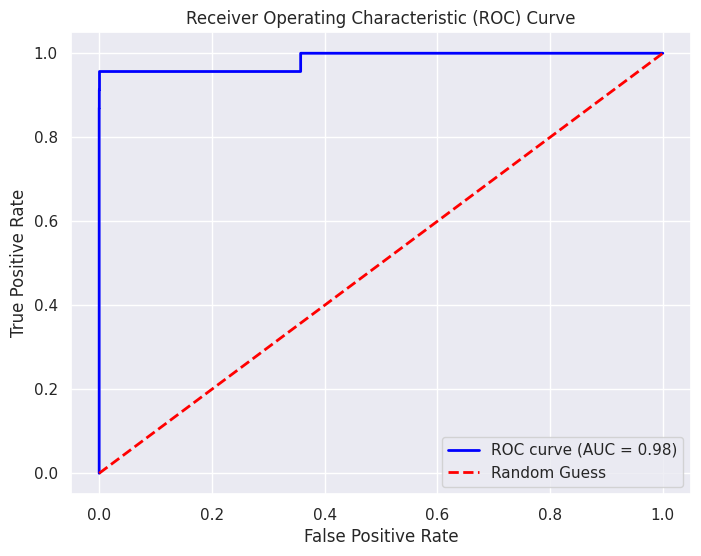

In [ ]:
y_prob = XGB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
ens = VotingClassifier(estimators=[
    ('lr', LR),
    ('dt', DT),
    ('rf', rfc),
    ('gb', GB),
    ('xgb',XGB)
],  voting='soft')
# Fit the ensemble classifier on the training data
ens.fit(X_train_imputed, Y_train)

# Predictions from the ensemble classifier
ens_pred = ens.predict(X_test)

# Evaluate the ensemble classifier
print(classification_report(Y_test,ens_pred))
ens_accuracy = accuracy_score(Y_test, ens_pred)
print('Ensemble Classifier accuracy is: {:.2f}%'.format(ens_accuracy * 100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14710
         1.0       1.00      0.39      0.56        23

    accuracy                           1.00     14733
   macro avg       1.00      0.70      0.78     14733
weighted avg       1.00      1.00      1.00     14733

Ensemble Classifier accuracy is: 99.90%


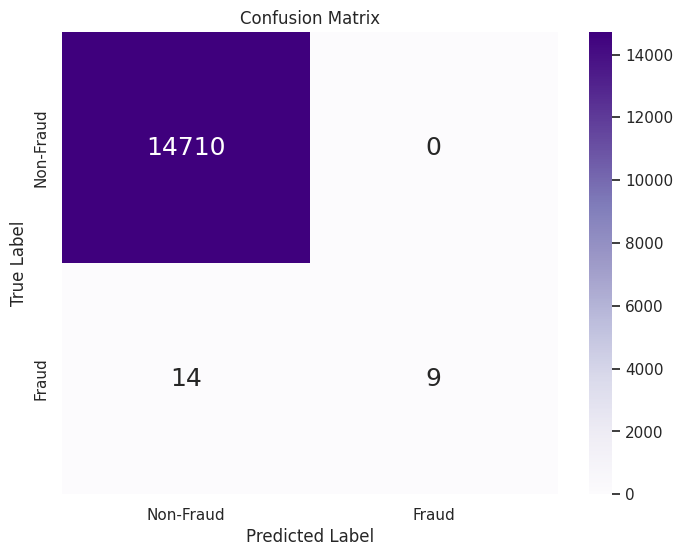

In [ ]:

cm = confusion_matrix(Y_test, ens_pred)  # Using predictions from gradient boosting

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={'size': 18},
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score: 0.9975615523305648


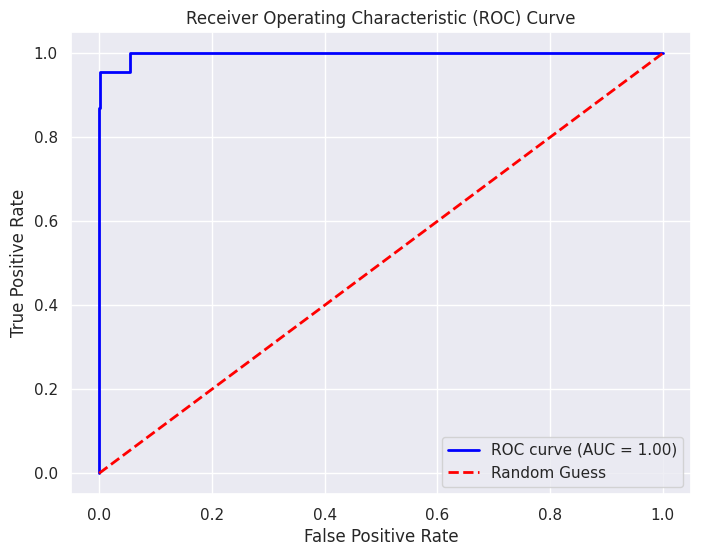

In [ ]:
y_prob = ens.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','XG Boosting','Ensembling'],
              "Accuracy":[accuracy_score(Y_test,predict_LR)*100,accuracy_score(Y_test,predict_DT)*100,
                          accuracy_score(Y_test,predict_rfc)*100,
                          accuracy_score(Y_test,GB_pred)*100,accuracy_score(Y_test,predict_XGB)*100,
                          accuracy_score(Y_test,ens_pred)*100]})

,Models,Accuracy
0,Logistic Regression,99.837100
1,Decision Tree,99.843888
2,Random Forest,99.932125
3,Gradient Boosting,99.904975
4,XG Boosting,99.979638
5,Ensembling,99.904975


In [ ]:
# @title PREDICTION

%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Credit Card Fraud Detection</title>
    <style>
  .cell.code_cell .input {
    display: none;
  }
  </style>
    <style>
          body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }
        h1 {
            text-align: center;
            color: #333;
            margin-top: 20px;
        }
        .container {
            max-width: 600px;
            margin: 20px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        label {
            display: block;
            margin-bottom: 5px;
            color: #333;
        }
        input[type="text"] {
            width: 100%;
            padding: 10px;
            margin-bottom: 10px;
            border: 1px solid #ccc;
            border-radius: 5px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            padding: 10px 20px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            width: 100%;
            margin-top: 10px;
        }
        button:hover {
            background-color: #45a049;
        }
        #prediction {
            margin-top: 20px;
            font-weight: bold;
            color: #FF5733;
        }
    </style>
</head>
<body>
     <h1>Credit Card Fraud Detection</h1>
    <img src="https://miro.medium.com/v2/resize:fit:640/0*_6WEDnZubsQfTMlY.png"  style="display: block; margin: 0 auto;">

    <div>
        <label for="amount">Amount:</label>
        <input type="text" id="amount" name="amount">
    </div>
    <div>
        <label for="oldbalanceOrg">Old Balance Origin:</label>
        <input type="text" id="oldbalanceOrg" name="oldbalanceOrg">
    </div>
   <div>
    <label for="type">Type:</label>
    <select id="type" name="type">
        <option value="Payment">Payment</option>
        <option value="Transfer">Transfer</option>
        <option value="Cash Out">Cash Out</option>
        <option value="Cash In">Cash In</option>
        <option value="Debit">Debit</option>
    </select>
    </div>

    <!-- Add input fields for other transaction details -->
    <button onclick="predict()">Predict</button>

    <div id="prediction"></div>

    <script>
function predict() {
    // Get input values
    var amount = parseFloat(document.getElementById('amount').value);
    var oldbalanceOrg = parseFloat(document.getElementById('oldbalanceOrg').value);
    var type = document.getElementById('type').value;

    // Make prediction
    var prediction;
    if (amount > 100000 && oldbalanceOrg < 500 && (type == "Payment" || type == "Cash Out")) {
        prediction = "Fraudulent";
    } else {
        prediction = "Not Fraudulent";
    }

    // Display prediction result
    document.getElementById('prediction').innerHTML = "<p>Prediction: " + prediction + "</p>";
}

    </script>
</body>
</html>
